In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [41]:
def GetAdams_5(f,x,yrk1):
    
    h = x[1] - x[0]
    
    y = yrk1.copy()
    
    yc = y.copy()
    
    for i in range(5,len(x)):
        
        y[i] = y[i-1] + (1/720)*h*( 1901*f(x[i-1],y[i-1]) - 2774*f(x[i-2],y[i-2]) +2616*f(x[i-3],y[i-3])-1274*f(x[i-4],y[i-4]) +251*f(x[i-5],y[i-5]) )
        
        yc[i] = y[i]
        
        
        # Moulton 5 orden
        yc[i] = yc[i-1] + (1/1440)*h*(475*f(x[i],y[i])+1427*f(x[i-1],y[i-1])-798*f(x[i-2],y[i-2])+482*f(x[i-3],y[i-3])-173*f(x[i-4],y[i-4])+27*f(x[i-5],y[i-5]) )
        
    
    return y,yc

In [42]:
def GetRungeKutta4(x,h,f,y0):
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1] +h*k3)
        
        y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)

    return y

In [43]:
def f(x,y):
    return x + 2*y  

In [44]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [45]:
N = 100
t = np.linspace(0,4,N)
yext = Solucion(t)

In [46]:
h = t[1] - t[0]
yrk4 = GetRungeKutta4(t,h,f,0)
bash4,moulton5 = GetAdams_5(f,t,yrk4)


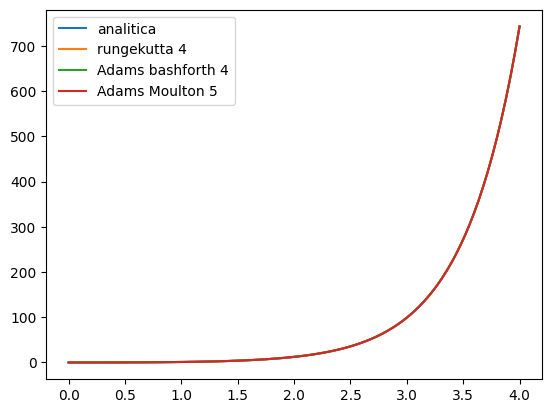

In [47]:
plt.plot(t,yext,label="analitica")
plt.plot(t,yrk4,label="rungekutta 4")
plt.plot(t,bash4,label='Adams bashforth 4')
plt.plot(t,moulton5,label='Adams Moulton 5')
plt.legend()

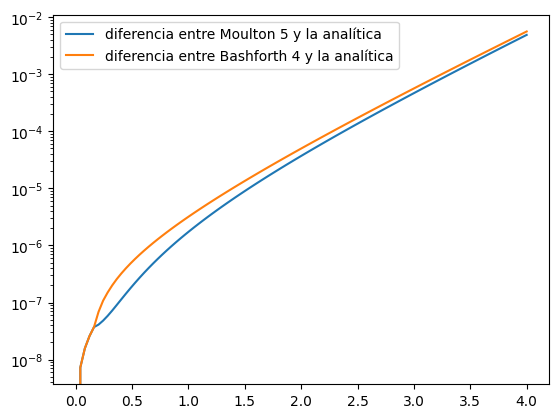

In [49]:
plt.yscale("log")
plt.plot(t,abs(yext-moulton5),label="diferencia entre Moulton 5 y la analítica")
plt.plot(t,abs(bash4-yext),label="diferencia entre Bashforth 4 y la analítica")
plt.legend()